In [1]:
#https://github.com/imkhoa99/Time-Series-Analysis-and-Weather-Forecast-/blob/master/.ipynb_checkpoints/Weather%20DS%20project-checkpoint.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [77]:
weatherData = pd.read_csv('bristol 2021-01-01 to 2021-12-31.csv',parse_dates=['datetime'], sep=','
                     , infer_datetime_format=True)

In [78]:
weatherData.head(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,bristol,2021-01-01,3.0,-1.3,1.1,0.0,-3.2,-1.2,0.3,94.6,...,1.3,1,NaN,2021-01-01T08:15:50,2021-01-01T16:12:30,0.53,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"03743099999,03716099999,03644099999,0372439999..."
1,bristol,2021-01-02,3.0,-1.0,1.1,1.0,-5.4,-1.9,-0.1,91.8,...,1.7,2,NaN,2021-01-02T08:15:41,2021-01-02T16:13:35,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"03743099999,03716099999,03644099999,0372439999..."
2,bristol,2021-01-03,3.1,0.0,1.7,0.0,-4.5,-2.7,1.4,97.6,...,1.2,1,NaN,2021-01-03T08:15:30,2021-01-03T16:14:43,0.60,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"03743099999,03716099999,03644099999,0372439999..."
3,bristol,2021-01-04,3.3,1.0,2.2,-1.9,-5.0,-3.2,0.7,90.5,...,1.5,1,NaN,2021-01-04T08:15:15,2021-01-04T16:15:53,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03853099999,03743099999,03716099999,0364409999..."
4,bristol,2021-01-05,3.1,0.1,1.4,-2.6,-5.3,-3.9,-0.5,87.4,...,2.8,2,NaN,2021-01-05T08:14:56,2021-01-05T16:17:06,0.70,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03853099999,03743099999,03716099999,0364409999..."
5,bristol,2021-01-06,2.3,-1.0,1.0,-1.0,-5.8,-3.5,-0.1,92.3,...,1.2,1,NaN,2021-01-06T08:14:35,2021-01-06T16:18:22,0.76,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03853099999,03743099999,03716099999,0364409999..."
6,bristol,2021-01-07,1.4,-3.0,-0.9,0.4,-6.1,-2.6,-1.3,97.1,...,1.8,1,NaN,2021-01-07T08:14:10,2021-01-07T16:19:39,0.82,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03853099999,03743099999,03716099999,0364409999..."
7,bristol,2021-01-08,1.1,-0.3,0.8,0.8,-4.4,-2.1,0.3,97.0,...,0.7,0,NaN,2021-01-08T08:13:42,2021-01-08T16:20:59,0.87,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,rain,"03853099999,03743099999,03716099999,0364409999..."
8,bristol,2021-01-09,0.1,-1.8,-0.7,0.1,-6.6,-3.2,-0.8,99.1,...,1.4,1,NaN,2021-01-09T08:13:11,2021-01-09T16:22:21,0.92,Overcast,Cloudy skies throughout the day.,cloudy,"03853099999,03743099999,03716099999,0364409999..."
9,bristol,2021-01-10,4.9,-1.1,1.7,2.2,-4.0,-0.8,1.3,96.7,...,2.1,2,NaN,2021-01-10T08:12:36,2021-01-10T16:23:45,0.96,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"03853099999,03743099999,03716099999,0364409999..."


In [45]:
tn_mu = np.array(weatherData.iloc[:,3])
tx_mu = np.array(weatherData.iloc[:,2])

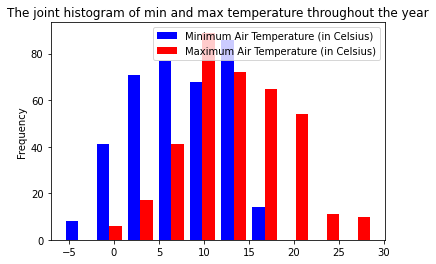

In [46]:
legend = ['Minimum Air Temperature (in Celsius)', 'Maximum Air Temperature (in Celsius)']
plt.hist([tn_mu,tx_mu], color=['blue','red'])
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('The joint histogram of min and max temperature throughout the year')
plt.show()

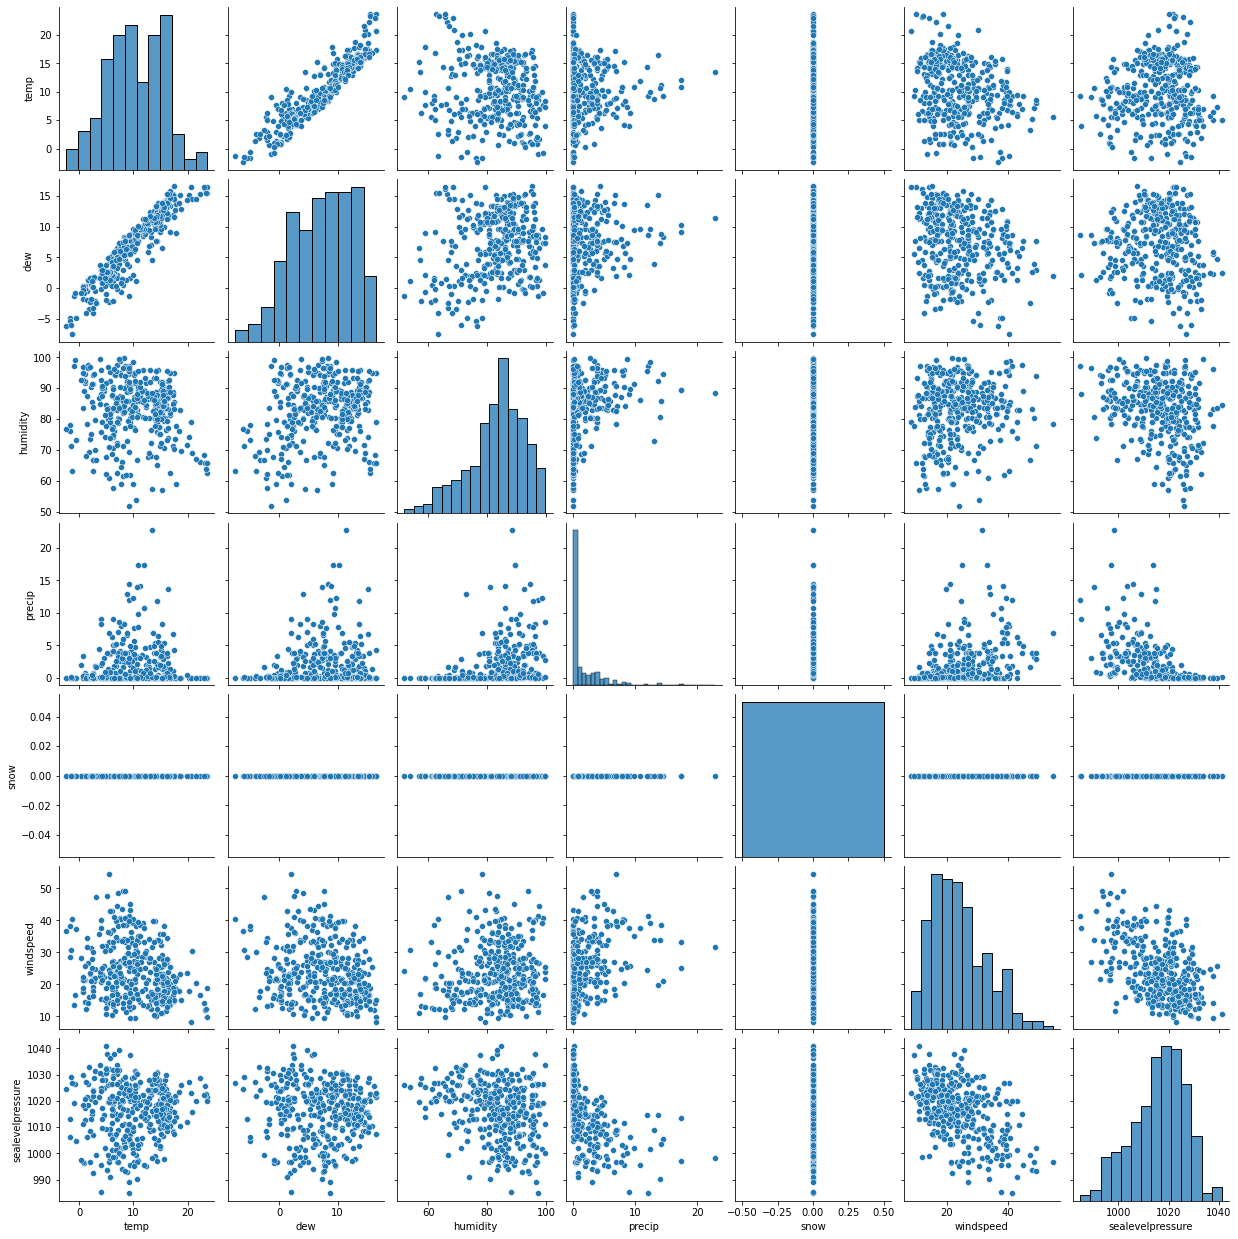

In [47]:
df_features = weatherData[['temp','dew','humidity','precip','snow','windspeed', 'sealevelpressure']]
sns.pairplot(df_features)

Checking data shows snow all 0 so might as well switch that out for something else.

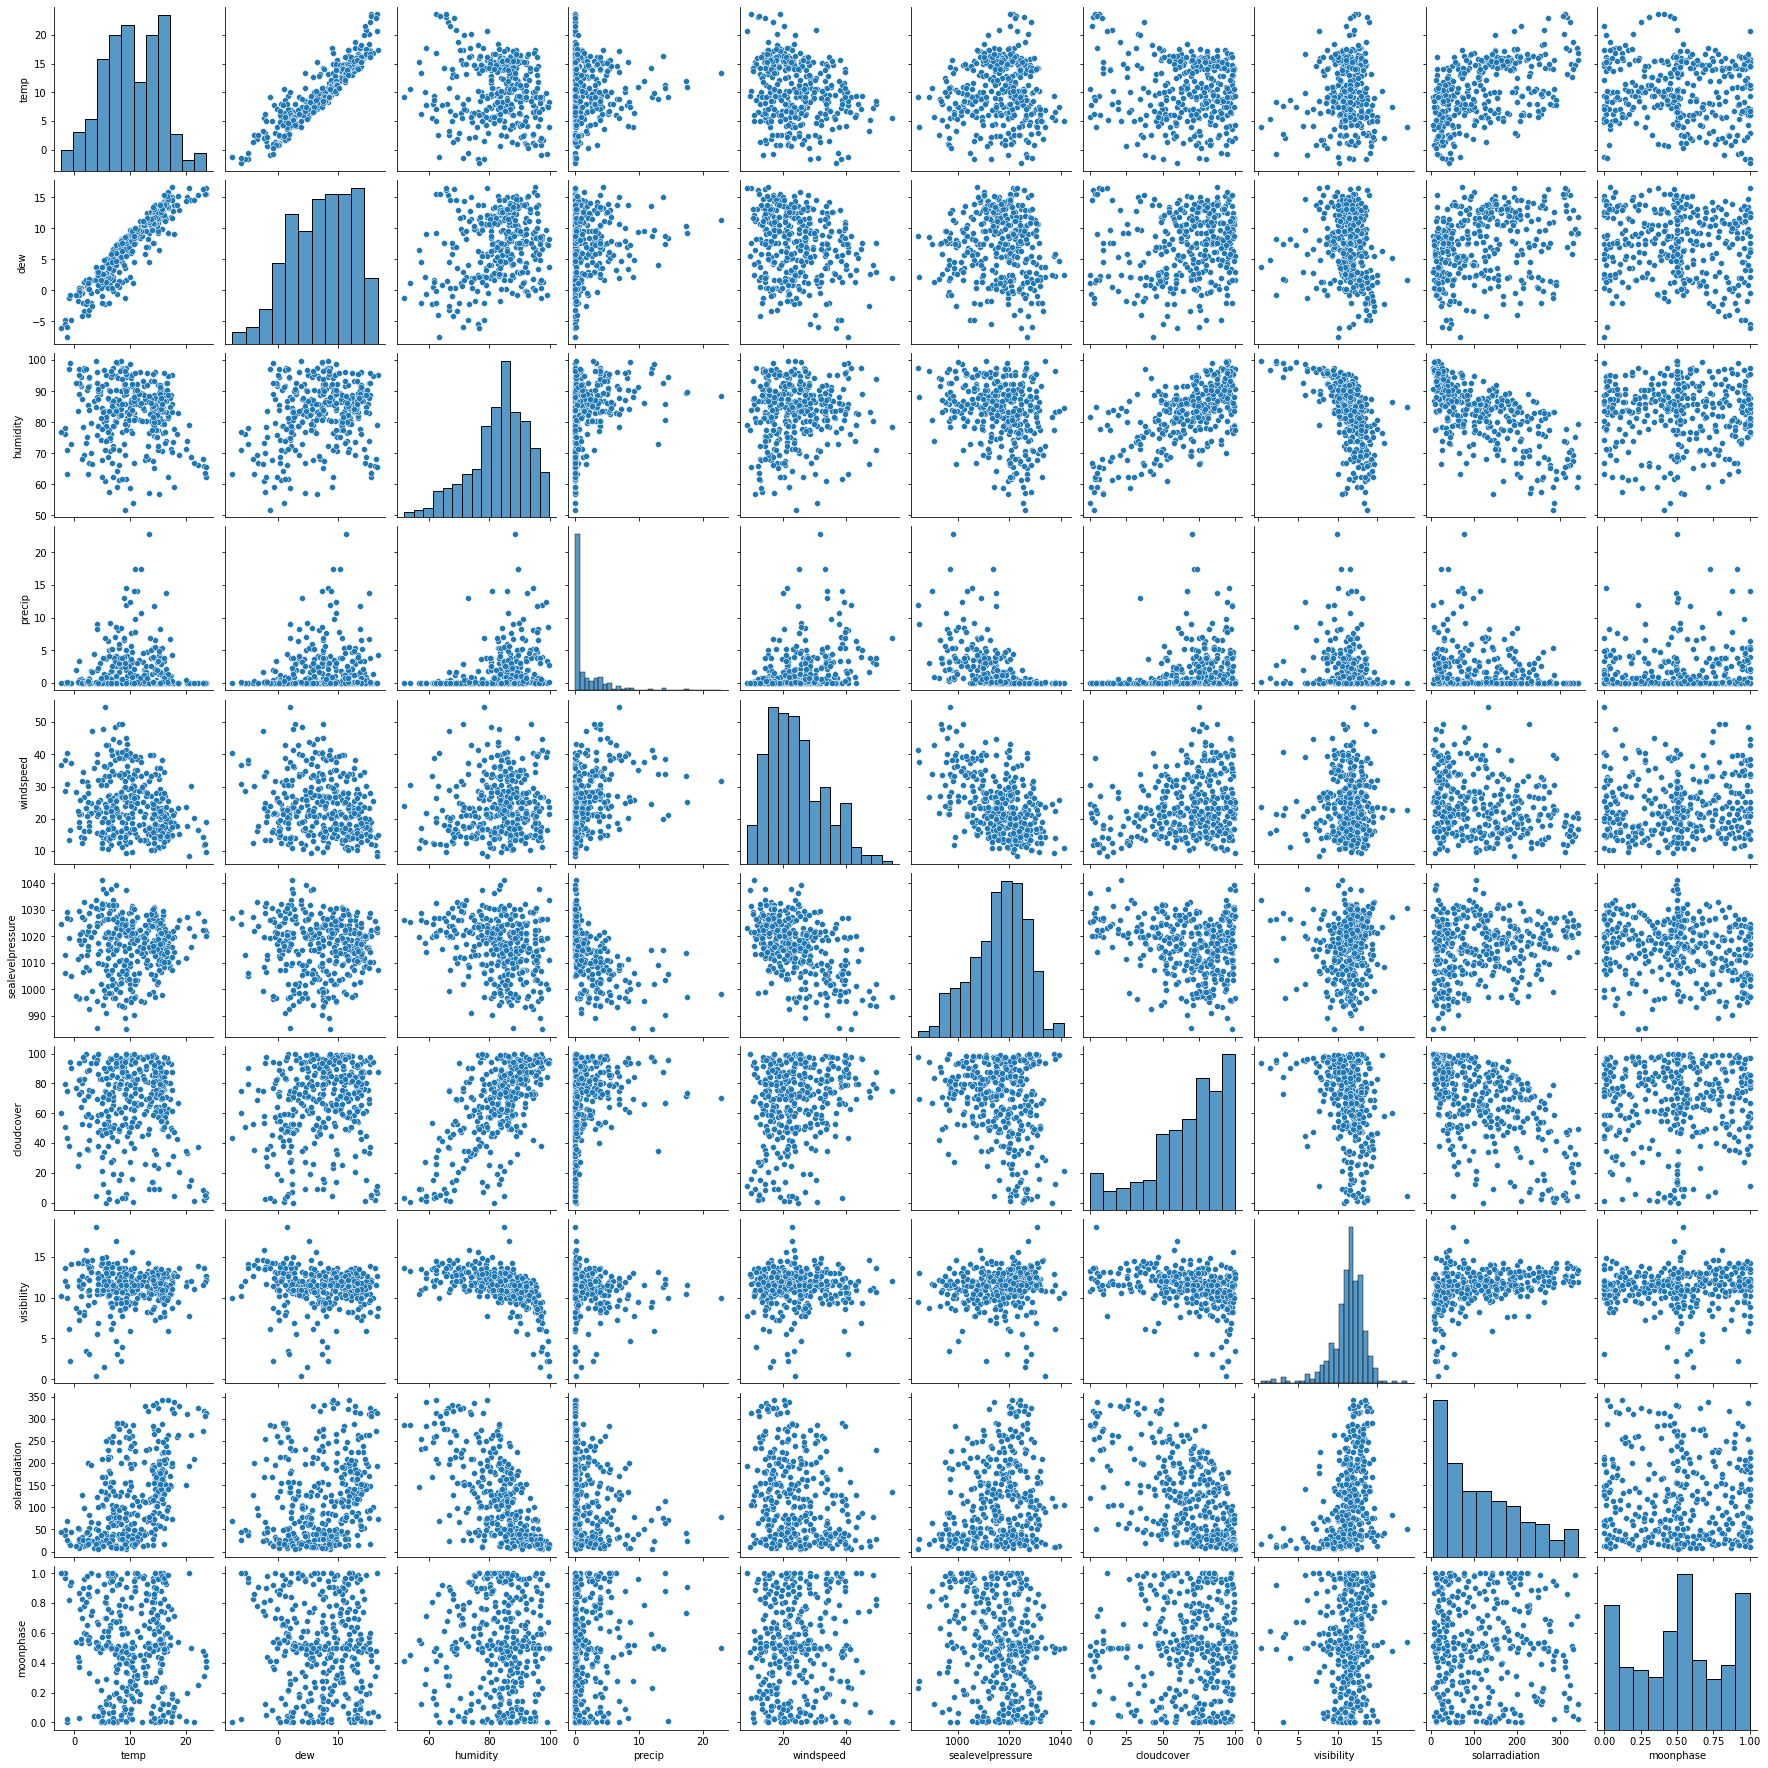

In [48]:
df_features = weatherData[['temp','dew','humidity','precip','windspeed', 'sealevelpressure','cloudcover', 'visibility', 'solarradiation', 'moonphase']]
sns.pairplot(df_features)

In [49]:
def corr_matrix(df_features):
    # Compute the correlation matrix
    corr = df_features.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    return sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

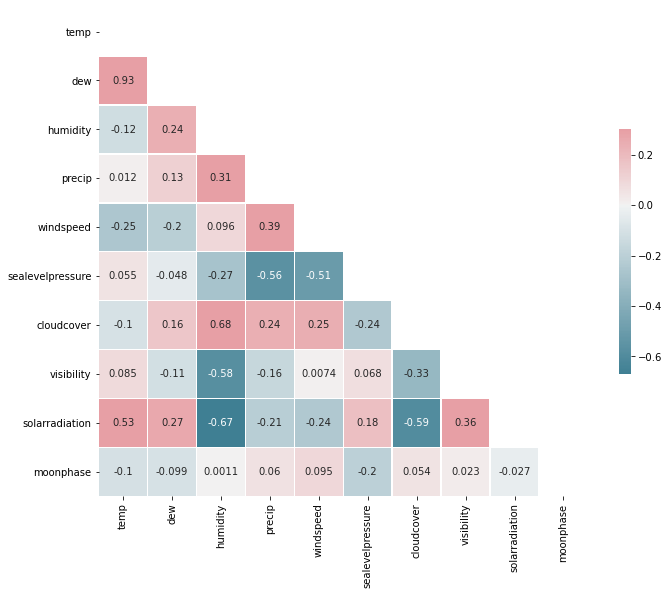

In [50]:
corr_matrix(df_features)

In [51]:

features = ['temp','dew','humidity','precip','windspeed', 'sealevelpressure','cloudcover', 'visibility', 'solarradiation', 'moonphase']
# Separating out the features
x = weatherData.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

This next block would not work with the data as there was a NaN datapoint. This was just one 'sealevelpressure' datapoint, so I input an average of the day before and day after in its place. 

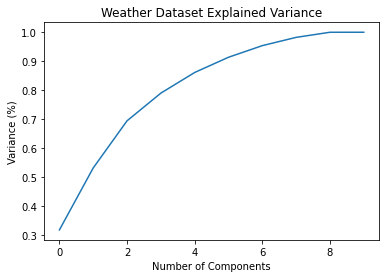

In [53]:
pca = PCA().fit(x)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Weather Dataset Explained Variance')
plt.show()

In [79]:
temp_df = weatherData[["datetime","temp"]]
temp_df.describe()
temp_df['datetime']

0     2021-01-01
1     2021-01-02
2     2021-01-03
3     2021-01-04
4     2021-01-05
         ...    
360   2021-12-27
361   2021-12-28
362   2021-12-29
363   2021-12-30
364   2021-12-31
Name: datetime, Length: 365, dtype: datetime64[ns]

Realised that some of the dates had got interpretted wrong (months and days mixed up) so I change the format in the csv and reloaded the data in.

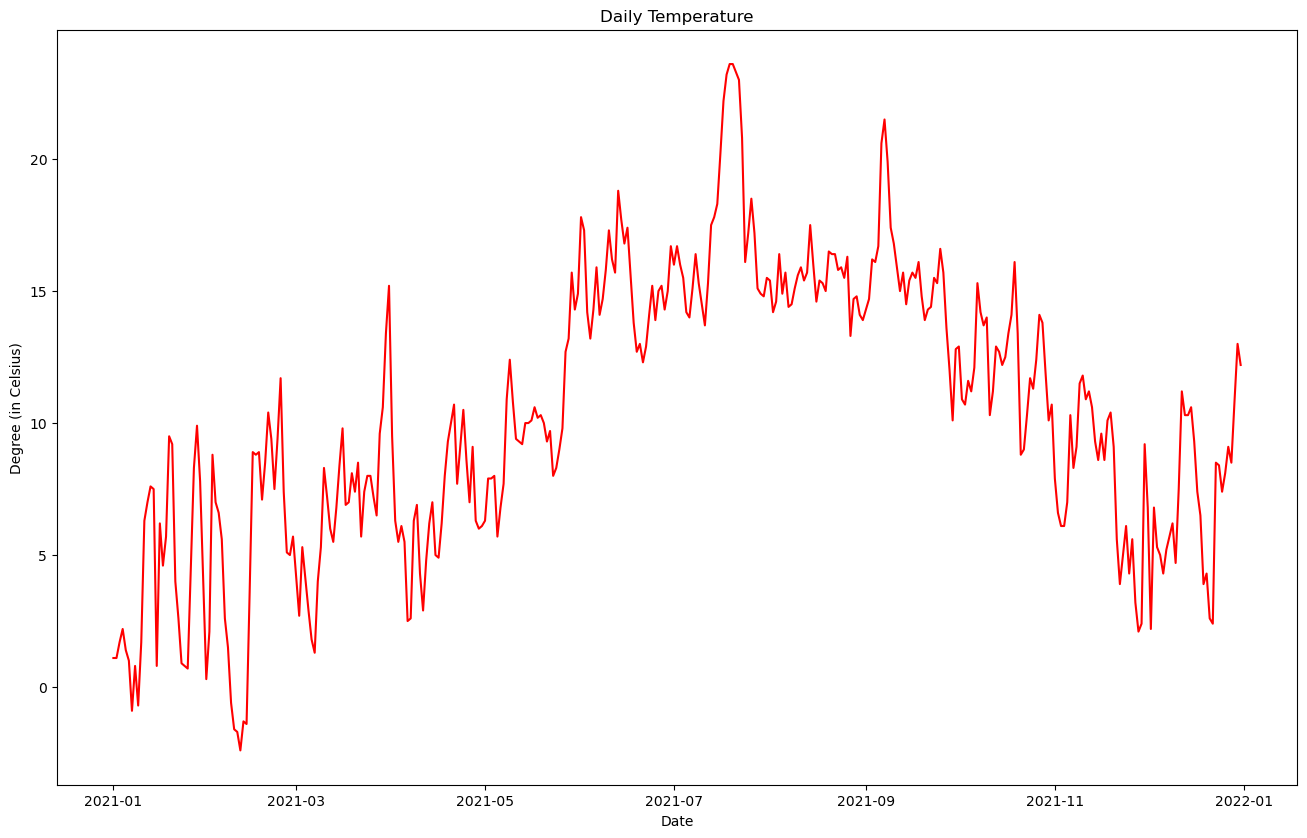

In [81]:

# Plot the daily temperature change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_df[['datetime']], temp_df[['temp']], color='red')
plt.gca().set(title="Daily Temperature", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()